In [10]:
import numpy as np
import pandas as pd
import sklearn
import autograd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [11]:
Macro=pd.read_csv('macro - CPIAUCSL.csv')

In [28]:
print(Macro.head(5))

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

print('Variables are as follows:')
print('DATE=date in dd/m/yy format,')
print('CPIAUCSL= consumer price index for all urban consumers (US),')
print('BUSLOANS=business loan rate (US),')
print('GDPC1= real GDP (US),')
print('FEDFUNDS= federal funds rate,')
print('UNRATE= unemployment rate,')
print('R/D= binary variable for government of day {1=republican, 0=democratic}')


print('~~~~~~Data sourced from FRED~~~~~~~')

   CPIAUCSL  BUSLOANS   GDPC1  FEDFUNDS  UNRATE  R/D
0    26.840   22.4539  2559.4      1.03     6.0    1
1    26.757   22.6042  2609.3      0.99     5.3    1
2    26.793   22.9938  2683.8      1.34     4.7    1
3    26.757   23.7303  2727.5      1.50     4.4    1
4    26.777   24.9522  2764.1      1.94     4.1    1
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Variables are as follows:
DATE=date in dd/m/yy format,
CPIAUCSL= consumer price index for all urban consumers (US),
BUSLOANS=business loan rate (US),
GDPC1= real GDP (US),
FEDFUNDS= federal funds rate,
UNRATE= unemployment rate,
R/D= binary variable for government of day {1=republican, 0=democratic}
~~~~~~Data sourced from FRED~~~~~~~


## I want to perform principle component analysis on the quantitative variables here

## I really need to normalise the data to account for difference in units of measurement and magnitude

## PCA is a way of taking (potentially correlated) variables   and to represent them in in space as linerally uncorrelated vectors (principle components) in order of amount of variance explained.

In [13]:
Macro=Macro.ix[:,Macro.columns!= 'DATE'] #remove non-quantitative variables (date)

rescaledX = (Macro - Macro.mean()) / Macro.std()
#This normalises the data

MacroX=pd.DataFrame(rescaledX) #this is rescaled data: between 0 and 1
MacroX.columns=['CPIAUCSL','BUSLOANS','GDPC1','FEDFUNDS','UNRATE','R/D']

In [14]:
pca=PCA(n_components=3) #somewhat arbitrary. Could make a cutoff point (<5% explained)
pca.fit(MacroX)

PCA(copy=True, n_components=3, whiten=False)

In [15]:
PC1 = np.array(pca.components_[0])
PC2 = np.array(pca.components_[1])
PC3 = np.array(pca.components_[2])

print('Variance explained  by principle components is:', pca.explained_variance_ratio_) 

Variance explained  by principle components is: [ 0.53848114  0.1934321   0.14010165]


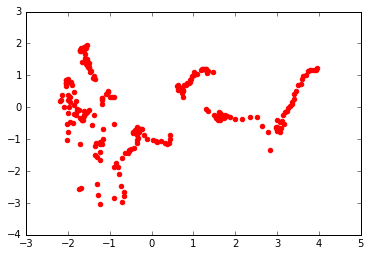

In [16]:
TranfX=pca.transform(MacroX)

plt.scatter(TranfX[:,0],TranfX[:,1], color='red')

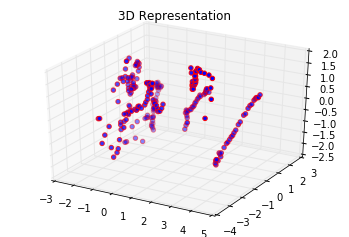

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(TranfX[:,0],TranfX[:,1],TranfX[:,2],color='red')
plt.title('3D Representation')

## Each PC is a linear combination of our variables:

$PC_{j}= \beta_{1}^{j}X_{1}+\beta_{2}^{j}X_{2}+...+\beta_{k}^{j}X_{k}$ 

## for k variables (6 in our case)

In [19]:
#Returning coefficients of principle component 

i = np.identity(MacroX.shape[1])  # identity matrix
i

coef=pca.transform(i)
coef

pd.DataFrame(coef, columns=['PC-1', 'PC-2','PC-3'], index=MacroX.columns)

,PC-1,PC-2,PC-3
CPIAUCSL,0.542819,-0.124651,0.086928
BUSLOANS,0.543103,-0.036021,0.116580
GDPC1,0.542091,-0.083285,0.129608
FEDFUNDS,-0.282507,-0.418017,-0.021752
UNRATE,0.117228,-0.660094,-0.676102
R/D,-0.151561,-0.604786,0.710258


# Analysing the components:

## PC1 has CPIAUCSL, BUSLOANS and GDPC1 as important factors. The other 3 are less represented here. PC1 represents ~53% of the total variation.

## PC2 has UNRATE and R/D as the most important factors, followed by FEDFUNDS. This PC represenst ~19% of total variation explained

## PC3 has R/D as a very important factor. PC3 represents ~14% of total variation explained.

In [20]:
np.linalg.norm(coef,axis=0) #this confirms that the principle components 
                            #indeed have a variance of 1- just making sure 
                            #being valid here

array([ 1.,  1.,  1.])

## I will now do the above, but using an autoencoder instead. An autoencoder 'encodes' your data and then 'decodes' it back together again. The decoding part is non-aritrary and involves less energy than the encoding itself. Thus, any reconstruction much be as efficient as possible (it aims to minimize an error function between the original input and the resulting decoded data). An autoencoder is therefore a ML solution to dimension reduction-like PCA.

In [30]:
#get Keras working: "Input" not working
#allocate to Monday, or another day with time.